In [2]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

In [6]:
master_df = pd.read_csv("../scenario_master_list.csv")

Goal: create exact timing interventions for each archetype and scenario.

Columns: archetype, interval, day

## Southern:
school calendar:

- Term 1: mid-Jan to mid-April
- Term 2: mid-May to mid-Aug
- Term 3: ea Sept to ea Dec

Now in terms of day numbers:
useful link: https://cals.arizona.edu/azmet/julian.html
- Term 1: 15-105
- Term 2: 135-227
- Term 3: 244-335

Take "monthly" to be same day of each month:
- Term 1 - done on the 15th: 15, 46, 74, 105
- Term 2 - done on the 15th: 135, 166, 196, 227
- Term 3 - done on the 1st: 244, 274, 305, 335

In [9]:
southern_monthly = pd.DataFrame({
    "archetype": "Southern",
    "interval": "month",
    "day": [15,46,74,105,135,166,196,227,244,274,305,335]
})

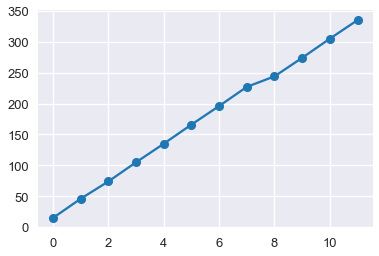

In [8]:
plt.plot(southern_monthly["day"], marker='o')

### Set up sweep values to check:

In [14]:
import itertools 

def create_df_from_combinations(input_dict):
    variable_names = []
    product_input_tuple = ()
    for key, value in input_dict.items():
        variable_names.append(key)
        product_input_tuple += (value,) # this is one way to add things to a tuple, apparently

    return pd.DataFrame(list(itertools.product(*product_input_tuple)), columns=variable_names)

In [24]:
delta_time = 10
t1_days = np.arange(15,105,delta_time)
t2_days = np.arange(135,227,delta_time)
t3_days = np.arange(244,335,delta_time)

if 105 not in t1_days:
    t1_days = np.append(t1_days, 105)
if 227 not in t2_days:
    t2_days = np.append(t2_days, 227)
if 335 not in t3_days:
    t3_days = np.append(t3_days, 335)
    
timing_sweep_df = create_df_from_combinations({
    "term1_day": t1_days,
    "term2_day": t2_days,
    "term3_day": t3_days
})

timing_sweep_df["scenario"] = range(len(timing_sweep_df))

In [26]:
timing_sweep_df.to_csv("southern_term_sweep_scenarios.csv", index=False)

## Create full intervention df

In [7]:
southern_by_term = pd.DataFrame({
    "archetype": "Southern",
    "interval": "term",
    "day": [35, 165, 254]
})

In [12]:
southern_by_day = pd.DataFrame({
    "archetype": "Southern",
    "interval": "day",
    "day": list(range(15,105+1)) + list(range(135,227+1)) + list(range(244,335+1))
})

In [14]:
southern_all = pd.concat([southern_monthly, southern_by_term, southern_by_day], ignore_index=True)

In [16]:
southern_all.to_csv("../ipt_schedule.csv", index=False)